In [3]:
#TASK1
#Step 1: Load or Create a Dataset with More Than 2 Dimensions
from sklearn.datasets import load_digits
import pandas as pd

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target  # 64-dimensional features, target labels

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f"pixel_{i}" for i in range(X.shape[1])])
df['target'] = y

# Display first few rows
print(df.head())  # Use this instead of ace_tools


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   pixel_60  pixel_61  pixel_62  pixel_63  target  
0      10.0     

In [5]:
#Step 2: Find the First Two Principal Components (With Sklearn )
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Display variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")


Explained Variance: [0.14890594 0.13618771]


In [7]:
#Find the First Two Principal Components (Without Sklearn )
import numpy as np

# Standardize the dataset
X_meaned = X - np.mean(X, axis=0)

# Compute covariance matrix
cov_matrix = np.cov(X_meaned.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues (descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]
top_2_eigenvectors = eigenvectors[:, sorted_indices[:2]]

# Project data onto first 2 principal components
X_manual_pca = X_meaned @ top_2_eigenvectors
print("PCA without sklearn completed.")


PCA without sklearn completed.


In [9]:
#Step 3: Practice PCA to Preserve a Certain Percentage of Variance
# Choose PCA that preserves 95% of variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

# Number of components selected
n_components_95 = pca_95.n_components_
print(f"Number of Components for 95% Variance: {n_components_95}")


Number of Components for 95% Variance: 29


In [17]:
#Step 4: Train a Neural Network Using (a) The Original Dataset , (b) The Principal Components
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network model (Fix the input layer definition)
def create_nn_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),  # Explicit Input Layer
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train on the original dataset
nn_original = create_nn_model(X_train.shape[1])
nn_original.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Train on PCA-transformed dataset
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
nn_pca = create_nn_model(X_train_pca.shape[1])
nn_pca.fit(X_train_pca, y_train, epochs=10, validation_data=(X_test_pca, y_test))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0951 - loss: 2.3788 - val_accuracy: 0.3972 - val_loss: 1.8312
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4539 - loss: 1.6940 - val_accuracy: 0.7250 - val_loss: 1.2678
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7765 - loss: 1.1108 - val_accuracy: 0.8278 - val_loss: 0.7899
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.7118 - val_accuracy: 0.8750 - val_loss: 0.5209
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.4602 - val_accuracy: 0.8972 - val_loss: 0.3823
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9153 - loss: 0.3406 - val_accuracy: 0.9361 - val_loss: 0.2977
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.2539 - val_accuracy: 0.9528 - val_loss: 0.2379
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1802 - val_accuracy: 0.9611 - val_loss:

In [19]:
#Step 5: Repeat Step 4 Using Kernel PCA (Linear, Sigmoid, RBF)

from sklearn.decomposition import KernelPCA

# Apply Kernel PCA with different kernels
kernels = ['linear', 'sigmoid', 'rbf']
kernel_pca_results = {}

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X)
    
    # Store results
    kernel_pca_results[kernel] = X_kpca

    # Train neural network with Kernel PCA features
    X_train_kpca, X_test_kpca, _, _ = train_test_split(X_kpca, y, test_size=0.2, random_state=42)
    nn_kpca = create_nn_model(X_train_kpca.shape[1])
    nn_kpca.fit(X_train_kpca, y_train, epochs=10, validation_data=(X_test_kpca, y_test))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1394 - loss: 3.7218 - val_accuracy: 0.3639 - val_loss: 1.9414
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3830 - loss: 1.9043 - val_accuracy: 0.5722 - val_loss: 1.5387
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5572 - loss: 1.5039 - val_accuracy: 0.5972 - val_loss: 1.3887
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5756 - loss: 1.3851 - val_accuracy: 0.6056 - val_loss: 1.2999
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5594 - loss: 1.3343 - val_accuracy: 0.6111 - val_loss: 1.2315
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 1.2050 - val_accuracy: 0.6250 - val_loss: 1.1827
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5994 - loss: 1.1748 - val_accuracy: 0.6139 - val_loss: 1.1477
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 1.1811 - val_accuracy: 0.6167 - val_loss:

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Pipeline
pipeline = Pipeline([
    ('kpca', KernelPCA(fit_inverse_transform=False)),  # Prevent inverse transform instability
    ('svm', SVC())
])

# Hyperparameter Grid
param_grid = {
    'kpca__n_components': [10, 20, 30],  # Avoid very high values
    'kpca__gamma': [0.001, 0.01, 0.1],  # Reduce gamma range
    'kpca__kernel': ['linear', 'rbf'],  # Remove 'sigmoid' due to instability
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

# Grid Search with Debugging
grid_search = GridSearchCV(pipeline, param_grid, cv=3, error_score='raise')  # Raise actual error
grid_search.fit(X_scaled, y)  # Use standardized data

# Best Parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'kpca__gamma': 0.001, 'kpca__kernel': 'linear', 'kpca__n_components': 30, 'svm__C': 10, 'svm__gamma': 'scale'}


In [ ]:
#TASK2#Classificatiom problem

In [25]:
#Step 1: Load the IRIS and Fashion MNIST datasets
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Load IRIS dataset
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

# One-hot encode labels for classification
encoder = OneHotEncoder(sparse_output=False)
y_iris = encoder.fit_transform(y_iris.reshape(-1, 1))

# Split into train and test
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42)

# Standardize
scaler_iris = StandardScaler()
X_iris_train = scaler_iris.fit_transform(X_iris_train)
X_iris_test = scaler_iris.transform(X_iris_test)

# Load Fashion MNIST dataset
(X_fmnist_train, y_fmnist_train), (X_fmnist_test, y_fmnist_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0-255 to 0-1)
X_fmnist_train, X_fmnist_test = X_fmnist_train / 255.0, X_fmnist_test / 255.0

# Flatten images (28x28 → 784)
X_fmnist_train = X_fmnist_train.reshape(-1, 28*28)
X_fmnist_test = X_fmnist_test.reshape(-1, 28*28)

# One-hot encode labels
y_fmnist_train = keras.utils.to_categorical(y_fmnist_train, 10)
y_fmnist_test = keras.utils.to_categorical(y_fmnist_test, 10)

print("Datasets Loaded Successfully")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Datasets Loaded Successfully


In [27]:
#Step 2: Build and Train a Neural Network for Classification
def build_nn_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_shape,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')  # Softmax for classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build models
iris_model = build_nn_model(input_shape=X_iris_train.shape[1], num_classes=3)
fmnist_model = build_nn_model(input_shape=X_fmnist_train.shape[1], num_classes=10)

# Train models
iris_model.fit(X_iris_train, y_iris_train, epochs=20, validation_data=(X_iris_test, y_iris_test), verbose=1)
fmnist_model.fit(X_fmnist_train, y_fmnist_train, epochs=10, validation_data=(X_fmnist_test, y_fmnist_test), verbose=1)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3975 - loss: 1.1733 - val_accuracy: 0.6000 - val_loss: 1.1076
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5814 - loss: 1.0657 - val_accuracy: 0.6333 - val_loss: 1.0032
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6075 - loss: 0.9805 - val_accuracy: 0.6333 - val_loss: 0.9128
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6583 - loss: 0.9046 - val_accuracy: 0.6667 - val_loss: 0.8403
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6344 - loss: 0.8354 - val_accuracy: 0.6333 - val_loss: 0.7748
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6696 - loss: 0.7662 - val_accuracy: 0.7333 - val_loss: 0.7141
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8258 - loss: 0.7115 - val_accuracy: 0.9000 - val_loss: 0.6593
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8779 - loss: 0.6563 - val_accuracy: 0.9333 - val_loss: 0.6103


In [29]:
#Step 3: Tune Hyperparameters (Hidden Layers, Activation Functions, etc.)
# We will use KerasTuner to tune:
# Number of neurons per layer
# Activation functions
# Learning rate
import keras_tuner as kt

def build_tuner_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_fmnist_train.shape[1],)))

    # Tune number of hidden layers and neurons per layer
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                                     activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
    
    model.add(keras.layers.Dense(10, activation='softmax'))

    # Tune learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0001])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(build_tuner_model, objective='val_accuracy', max_trials=5, directory='tuner_results')

tuner.search(X_fmnist_train, y_fmnist_train, epochs=10, validation_split=0.2)

# Get the best model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

print("Best hyperparameters:", best_hyperparameters.values)


Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.8840833306312561

Best val_accuracy So Far: 0.8840833306312561
Total elapsed time: 00h 02m 00s
Best hyperparameters: {'num_layers': 1, 'units_0': 96, 'activation': 'relu', 'learning_rate': 0.001, 'units_1': 160, 'units_2': 224}


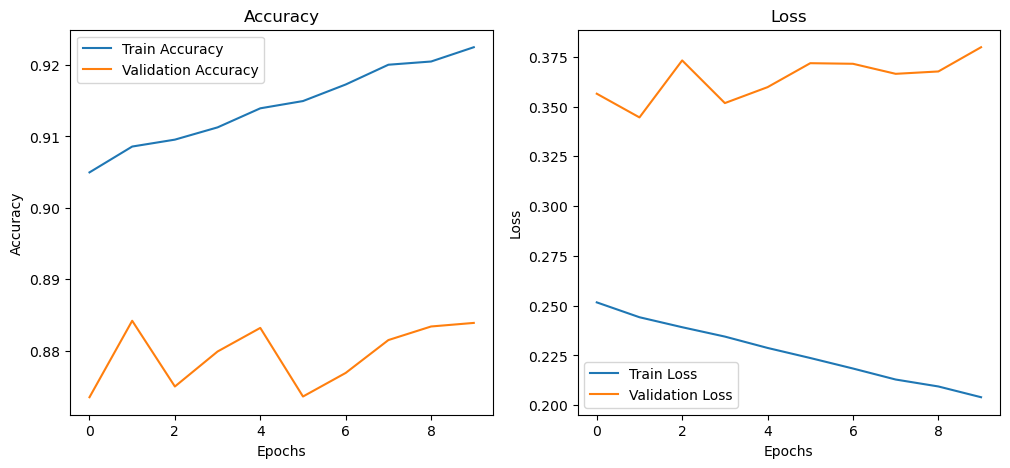

In [31]:
#Step 4: Plot Loss and Accuracy for Training and Testing Data
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_training_history(history, title="Model Training History"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

# Plot for Fashion MNIST
history_fmnist = fmnist_model.fit(X_fmnist_train, y_fmnist_train, epochs=10, validation_data=(X_fmnist_test, y_fmnist_test), verbose=0)
plot_training_history(history_fmnist)


In [35]:
#Step 5: Save Weights and Use Callbacks
# Define Callbacks
# Define Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_fmnist_model.keras', save_best_only=True)  # Use `.keras`
]

# Retrain with callbacks
fmnist_model.fit(X_fmnist_train, y_fmnist_train, epochs=20, validation_data=(X_fmnist_test, y_fmnist_test), callbacks=callbacks)



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9265 - loss: 0.1953 - val_accuracy: 0.8843 - val_loss: 0.3763
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9276 - loss: 0.1908 - val_accuracy: 0.8826 - val_loss: 0.3794
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9269 - loss: 0.1916 - val_accuracy: 0.8768 - val_loss: 0.3998
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9286 - loss: 0.1891 - val_accuracy: 0.8881 - val_loss: 0.3790
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9300 - loss: 0.1839 - val_accuracy: 0.8818 - val_loss: 0.4063
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9318 - loss: 0.1818 - val_accuracy: 0.8874 - val_loss: 0.3852


In [49]:
# Step 6: Save and Load the Trained Model

#Save the trained model WITHOUT saving the optimizer state
fmnist_model.save("fashion_mnist_model.keras", include_optimizer=False)

#Load the saved model WITHOUT compiling immediately
loaded_model = keras.models.load_model("fashion_mnist_model.keras", compile=False)

#Recompile the model with a fresh optimizer
loaded_model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the reloaded model
test_loss, test_acc = loaded_model.evaluate(X_fmnist_test, y_fmnist_test)
print(f"Loaded Model Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.8829 - loss: 0.3882
Loaded Model Accuracy: 0.8843


In [ ]:
#task3#Reggression problem:

In [ ]:
#Step 1: Load the California Housing Dataset and Split into Training/Testing Sets

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target  # Features and target (price)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (neural networks perform better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("California Housing dataset loaded and preprocessed.")


California Housing dataset loaded and preprocessed.


In [59]:
import tensorflow as tf
from tensorflow import keras

# Define the regression model correctly
def build_regression_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),  # Explicit Input Layer
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Single output neuron for regression
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error loss
    return model

# Build and train the model
regression_model = build_regression_model()
history = regression_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

print("Neural Network training completed.")


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7610 - mae: 0.8859 - val_loss: 0.4715 - val_mae: 0.4788
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4189 - mae: 0.4613 - val_loss: 0.4001 - val_mae: 0.4487
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3636 - mae: 0.4323 - val_loss: 0.3905 - val_mae: 0.4300
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3871 - mae: 0.4313 - val_loss: 0.3536 - val_mae: 0.4232
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3332 - mae: 0.4057 - val_loss: 0.3788 - val_mae: 0.4370
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3559 - mae: 0.4040 - val_loss: 0.3770 - val_mae: 0.4115
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3138 - mae: 0.3907 - val_loss: 0.3306 - val_mae: 0.4106
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3058 - mae: 0.3879 - val_loss: 0.3141 - val_mae: 0.3928
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

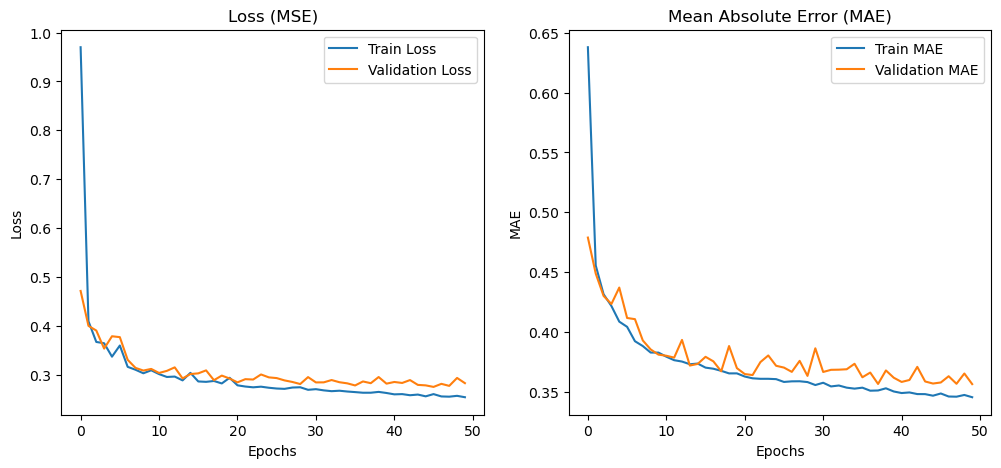

In [63]:
#Step 3: Plot the Network Training History
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(history, title="Training History"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Loss (MSE)
    ax[0].plot(history.history['loss'], label='Train Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss (MSE)')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot Mean Absolute Error (MAE)
    ax[1].plot(history.history['mae'], label='Train MAE')
    ax[1].plot(history.history['val_mae'], label='Validation MAE')
    ax[1].set_title('Mean Absolute Error (MAE)')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('MAE')
    ax[1].legend()

    plt.show()

# Plot the network history
plot_history(history)


In [67]:
#Step 4: Change the Learning Rate and Train Again
# Define a function to build a model with a specific learning rate
def build_model_with_lr(learning_rate):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),  # Explicit Input Layer
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Single output neuron for regression
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)  # Set learning rate
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Train the model with a smaller learning rate (e.g., 0.0005)
low_lr_model = build_model_with_lr(learning_rate=0.0005)
history_low_lr = low_lr_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Train the model with a larger learning rate (e.g., 0.01)
high_lr_model = build_model_with_lr(learning_rate=0.01)
history_high_lr = high_lr_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0100 - mae: 0.9828 - val_loss: 0.5404 - val_mae: 0.5213
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4738 - mae: 0.4914 - val_loss: 0.4243 - val_mae: 0.4673
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4037 - mae: 0.4541 - val_loss: 0.3988 - val_mae: 0.4472
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3713 - mae: 0.4362 - val_loss: 0.3863 - val_mae: 0.4528
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3761 - mae: 0.4372 - val_loss: 0.3723 - val_mae: 0.4415
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3755 - mae: 0.4309 - val_loss: 0.3683 - val_mae: 0.4308
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4000 - mae: 0.4240 - val_loss: 0.3656 - val_mae: 0.4215
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3552 - mae: 0.4155 - val_loss: 0.3503 - val_mae: 0.4129
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

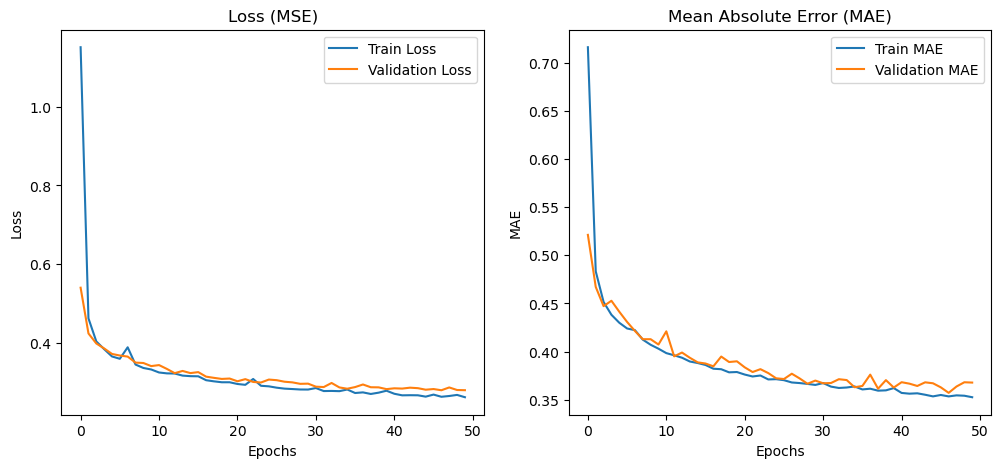

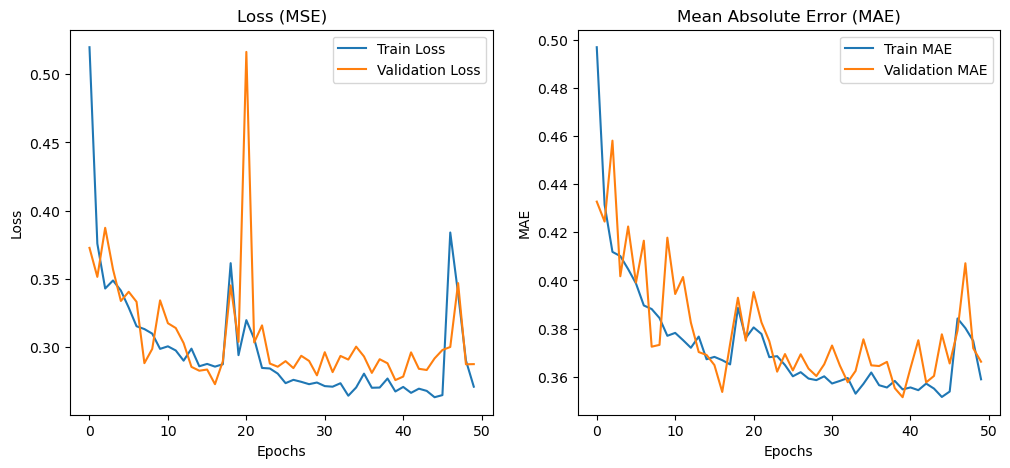

In [71]:
# Compare training histories
plot_history(history_low_lr, title="Training with Low Learning Rate (0.0005)")
plot_history(history_high_lr, title="Training with High Learning Rate (0.01)")

In [69]:
#Step 5: Save Model Weights and Use Callbacks
# Define Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_regression_model.keras', save_best_only=True)
]

# Train the model with callbacks
regression_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=callbacks, verbose=1)


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2546 - mae: 0.3443 - val_loss: 0.2878 - val_mae: 0.3559
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2474 - mae: 0.3410 - val_loss: 0.2907 - val_mae: 0.3700
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2555 - mae: 0.3438 - val_loss: 0.2792 - val_mae: 0.3579
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2491 - mae: 0.3387 - val_loss: 0.2846 - val_mae: 0.3602
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2562 - mae: 0.3432 - val_loss: 0.2820 - val_mae: 0.3618
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2516 - mae: 0.3430 - val_loss: 0.2780 - val_mae: 0.3619
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2726 - mae: 0.3447 - val_loss: 0.2737 - val_mae: 0.3539
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2508 - mae: 0.3412 - val_loss: 0.2803 - val_mae: 0.3724
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [73]:
#Step 6: Save and Load the Trained Model
# Save the entire model in the new Keras format
regression_model.save("california_housing_model.keras")
# Load the saved model
loaded_regression_model = keras.models.load_model("california_housing_model.keras")

# Recompile to ensure correct evaluation
loaded_regression_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Evaluate the loaded model
test_loss, test_mae = loaded_regression_model.evaluate(X_test, y_test)
print(f"Loaded Model MAE: {test_mae:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2663 - mae: 0.3515  
Loaded Model MAE: 0.3539
